# Homework 2 Answers

Note: I say "answers," but really there are very many ways of doing each of these problems. 

In [81]:
# Import all your libraries here. 
import pandas as pd
import numpy as np
import nltk
from collections import Counter
%matplotlib inline 

### 1. Write a function that takes a text in English (i.e. a string), then computes the average number of words per sentence, for that text. 

In [1]:
testParagraph = """We were each attached to a party sent out by the general’s orders to prevent the plunder and confusion which followed our conquest. The camp-followers committed deplorable excesses; and, worse still, the soldiers found their way, by a guarded door, into the treasury of the Palace, and loaded themselves with gold and jewels. It was in the court outside the treasury that my cousin and I met, to enforce the laws of discipline on our own soldiers. Herncastle’s fiery temper had been, as I could plainly see, exasperated to a kind of frenzy by the terrible slaughter through which we had passed. He was very unfit, in my opinion, to perform the duty that had been entrusted to him."""

In [5]:
def avgWordsPerSentence(text): 
    """ 
    This function computes the average number of words per sentence of a text. 
        Input: a string
        Output: a number (float) average number of words per sentence in that string. 
    """
    sentences = nltk.sent_tokenize(text)
    numWordsList = [len(nltk.word_tokenize(sent)) for sent in sentences]
    return sum(numWordsList)/len(numWordsList)

In [6]:
avgWordsPerSentence(testParagraph)

27.8

### 2. Use your function to calculate the average sentence length for all the narrators we have read so far (Betteredge, Clack, Bruff, Blake). Then, in a markdown cell, describe what you think this might indicate.

In [9]:
moonstone = open('../Texts/moonstone.md').read()

In [10]:
moonstoneParts = moonstone.split('\n## ')

In [11]:
fourNarrators = [moonstoneParts[x] for x in [2,4,5,6]]

In [13]:
for narr in fourNarrators: 
    print(avgWordsPerSentence(narr))

24.942984760903837
21.6354415274463
26.663736263736265
23.822536496350367


Enter markdown here. 

### 3. Choose a motif that you notice in _The Moonstone_. Choose around 3-5 words (or tokens, stems, or lemmas) that you think represent this motif. Create a plot to show the positions of these words in the narrative time of _The Moonstone_ (at least the amount that we've read of it). Then create concordances for a few of these words. Finally, in 2-3 paragraphs of well-formatted markdown, describe what this tells you about how the motif operates in the novel. 

In [25]:
moonstoneText = nltk.Text(nltk.word_tokenize(moonstone.lower()))

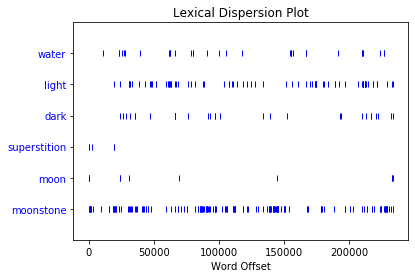

In [26]:
moonstoneText.dispersion_plot(['water', 'light', 'dark', 'superstition', 'moon', 'moonstone'])

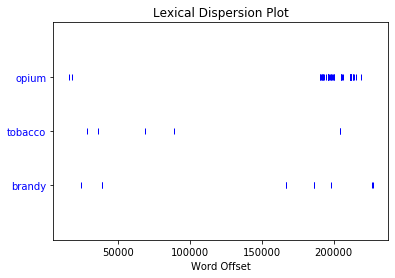

In [27]:
moonstoneText.dispersion_plot(['opium', 'tobacco', 'brandy'])

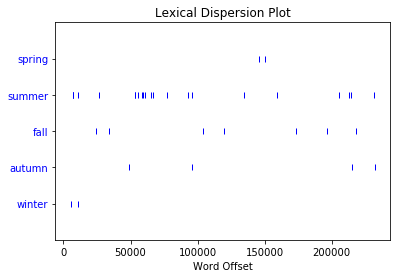

In [28]:
moonstoneText.dispersion_plot(['spring', 'summer', 'fall', 'autumn', 'winter'])

In [29]:
[moonstoneText.concordance(word) for word in ['spring', 'summer', 'fall', 'autumn', 'winter']]

Displaying 2 of 2 matches:
anklin blake # # # chapter i in the spring of the year eighteen hundred and fo
r money and your temper–in the fine spring time of your life , sir–by meddling
Displaying 22 of 22 matches:
 house . the thursday was as fine a summer ’ s day as ever you saw : and my la
our claret , and set it in the warm summer air to take off the chill before di
oncluding to set myself in the warm summer air next–seeing that what is good f
ing in from the offing . winter and summer , when the tide flows over the quic
e a wedding in the house before the summer was over . others ( led by me ) adm
ling the tune of “ the last rose of summer ” softly to himself . later in the 
 which occasions “ the last rose of summer ” evidently helped and encouraged h
 and he whistled “ the last rose of summer ” softly to himself . at last , sam
 , and whistling “ the last rose of summer ” to himself . “ any discoveries , 
er guard . i walked out in the fine summer afternoon , very sorry for the p

[None, None, None, None, None]

In [34]:
moonstoneTokens = nltk.word_tokenize(moonstone.lower())

In [65]:
opiumCounts = [1 if token == "rose" else 0 for token in moonstoneTokens]

In [66]:
opiumSeries = pd.Series(opiumCounts)

In [145]:
opiumBins = [np.sum(item) for item in np.array_split(np.array(opiumCounts), 20)]

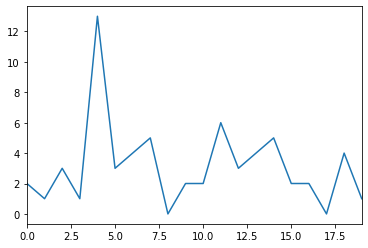

In [146]:
pd.Series(opiumBins).plot()

Enter markdown here. 

### 4. Find the distinctive words of Ezra Jennings' narrative (what we're reading for Monday). Discuss these words, and your interpretation of them. Can you hear Jennings's personality come through in these? Why or why not?

In [148]:
# Enter code here. 
moonstoneParts[7][:200]

'Fourth Narrative\n\nExtracted from the Journal of EZRA JENNINGS\n\n1849.–June 15…. With some interruption from patients, and some\ninterruption from pain, I finished my letter to Miss Verinder in time\nfor '

In [149]:
fiveNarrators = [moonstoneParts[x] for x in [2,4,5,6,7]] 

In [150]:
[part[:55] for part in fiveNarrators]

['First Period\n\nTHE LOSS OF THE DIAMOND (1848)\n\nThe event',
 'First Narrative\n\nContributed by MISS CLACK; niece of th',
 'Second Narrative\n\nContributed by MATHEW BRUFF, Solicito',
 'Third Narrative\n\nContributed by FRANKLIN BLAKE\n\n### Cha',
 'Fourth Narrative\n\nExtracted from the Journal of EZRA JE']

In [151]:
tokensFive = [nltk.word_tokenize(narr) for narr in fiveNarrators]

In [152]:
[len(tokens) for tokens in tokensFive]

[94933, 36261, 12132, 52219, 17350]

In [153]:
fiveCounters = [Counter(narr) for narr in tokensFive]

In [154]:
df = pd.DataFrame(fiveCounters).fillna(0).T

In [155]:
df['average'] = df.mean(axis=1)

In [156]:
df['ezraness'] = df[4] - df['average']

In [157]:
df.sort_values('ezraness', ascending=False)

,0,1,2,3,4,average,ezraness
Blake,55.0,27.0,11.0,48.0,89.0,46.0,43.0
Merridew,0.0,0.0,0.0,5.0,21.0,5.2,15.8
experiment,3.0,0.0,1.0,14.0,22.0,8.0,14.0
opium,2.0,0.0,0.0,19.0,21.0,8.4,12.6
laudanum,0.0,0.0,0.0,9.0,18.0,5.4,12.6
year,11.0,1.0,4.0,17.0,23.0,11.2,11.8
bed,16.0,8.0,0.0,20.0,24.0,13.6,10.4
o,7.0,3.0,0.0,8.0,17.0,7.0,10.0
Jennings,0.0,0.0,0.0,55.0,26.0,16.2,9.8
Bruff,8.0,57.0,17.0,49.0,45.0,35.2,9.8


Enter markdown here. 

### 5. Write a program to determine whose name appears in the most number of paragraphs with the words "moonstone" or "diamond." Then, in a markdown cell, describe anything you might notice about your results. 

Here's one way you might do this: 
 - Make a list of all names we've encountered in the novel so far. (Be careful to include both "Rachel" and "Miss Verinder," for instance.)
 - Break the novel into paragraphs by splitting on double line breaks (`\n\n`). 
 - Tokenize each paragraph. 
 - Test for the presence of a word using the `in` keyword for lists. 
 - Maintain a dictionary for each character, where the key is the character's name, and the value is a tally of how many times their name has appeared in the same paragraph as "moonstone" and "diamond." 

In [236]:
# Make a list of all names. 
# Note: This isn't a complete list. It's just an example. 


# Make a function to automate the process of including different versions of a name. 
def nameAliases(name): 
    """
    For a name, return permutations of that name. 
    Example: "Miss Rachel Verrinder" would return "Rachel, "Rachel Verrinder," "Miss Verrinder," and "Miss Rachel." 
    """
    title, first, last = name.split()
    return first, first + ' ' + last, title + ' ' + last, title + ' ' + first


namelist = ['Miss Rachel Verrinder', 'Mr. Franklin Blake', 'Miss Drusilla Clack', 'Mr. Gabriel Betteredge', 'Miss Rosanna Spearman']
bigNamelist = [nameAliases(name) for name in namelist]
bigNamelist

[('Rachel', 'Rachel Verrinder', 'Miss Verrinder', 'Miss Rachel'),
 ('Franklin', 'Franklin Blake', 'Mr. Blake', 'Mr. Franklin'),
 ('Drusilla', 'Drusilla Clack', 'Miss Clack', 'Miss Drusilla'),
 ('Gabriel', 'Gabriel Betteredge', 'Mr. Betteredge', 'Mr. Gabriel'),
 ('Rosanna', 'Rosanna Spearman', 'Miss Spearman', 'Miss Rosanna')]

In [237]:
nameCounts = {}

moonstoneParagraphs = moonstone.split('\n\n')

for para in moonstoneParagraphs: 
    if 'moonstone' in para.lower() or 'diamond' in para.lower(): 
        # Go through each character
        for nameList in bigNamelist: 
            # Use the first name as our dictionary key
            firstName = nameList[0]
            # Go through each name of each character
            for name in nameList: 
                if name in para: 
                    # If our dictionary has it already
                    if firstName in nameCounts: 
                        # Increment the count
                        nameCounts[firstName] += 1
                    else: 
                        # Otherwise start at 1
                        nameCounts[firstName] = 1

In [238]:
nameCounts

{'Franklin': 102, 'Rosanna': 43, 'Rachel': 107, 'Drusilla': 7}

Enter markdown here. 

### 6. Write a program to determine the words that occur more often in sentences ending in exclamation marks. In a markdown cell, describe anything you notice in your results. 

Here's one way you might do this: 

 - Sentence-tokenize the novel.
 - Make two empty lists, one for exclamation-mark sentences, and one for other sentences. 
 - Write a `for` loop to go through each sentence, and append it to one of the two lists, depending on whether it contains an exclamation mark.
 - Join the lists together, using `" ".join(list)`, so that they're easier to word-tokenize. 
 - Word-tokenize each string. 
 - Make `Counter()` objects for the resulting list of word-tokens. 
 - Subtract one set of numbers from the other, to find the words that occur much more in one category than another. 
 - Sort the results according to the difference in frequencies between the two.

In [182]:
# Break the text into sentences. 
moonstoneSents = nltk.sent_tokenize(moonstone)

# Split the sentences into two piles, according to whether they end with "!"
withEx = [sent for sent in moonstoneSents if sent.endswith('!')]
withoutEx = [sent for sent in moonstoneSents if not sent.endswith('!')]

# Sanity check
len(withEx), len(withoutEx)

(571, 9304)

In [183]:
# Join them back together
withExJoined = ' '.join(withEx)
withoutExJoined = ' '.join(withoutEx)

# Tokenize them
withTokens = nltk.word_tokenize(withExJoined)
withoutTokens = nltk.word_tokenize(withoutExJoined)

In [185]:
# Optional: remove stopwords
stop = ['a', 'an', 'the', 'in', 'of', 'he', 'she']
withTokens = [token for token in withTokens if token not in stops]
withoutTokens = [token for token in withoutTokens if token not in stops]

# - OR - use NLTK's list of English stopwords
from nltk.corpus import stopwords
stops = stopwords.words('english')
withTokens = [token for token in withTokens if token not in stops]
withoutTokens = [token for token in withoutTokens if token not in stops]

In [186]:
# Count them
withCounts = Counter(withTokens)
withoutCounts = Counter(withoutTokens)

In [187]:
# Make a Pandas DataFrame so that we can work with it easier
df = pd.DataFrame([withCounts, withoutCounts]).fillna(0).T

Here I'm using raw counts, but we could've also divided it by the number of words in each, to get proportions. 

In [180]:
df['exclamtoriness'] = df[0] - df[1]

In [181]:
df.sort_values('exclamtoriness', ascending=False)

,0,1,exclamtoriness
!,592.0,400.0,192.0
Oh,29.0,20.0,9.0
Alas,8.0,0.0,8.0
oh,9.0,5.0,4.0
Mind,4.0,0.0,4.0
Lord,11.0,8.0,3.0
murderer,3.0,0.0,3.0
Art,2.0,0.0,2.0
thump-thump,2.0,0.0,2.0
union,2.0,0.0,2.0


### Bonus: Write a program to determine the words that occur more often in parenthetical expressions. What do you notice about these words? 

In [244]:
inParens = []
outParens = []
isIn = False # Our switch
for token in moonstoneTokens: 
    if token == '(': 
        isIn = True
        continue # I.e., go to the next item in the for loop
    if token == ')': 
        isIn = False
        continue
    if isIn: 
        inParens.append(token)
    else: 
        outParens.append(token)

In [246]:
len(inParens), len(outParens)

(3617, 229319)

In [250]:
df = pd.DataFrame([Counter(inParens), Counter(outParens)]).fillna(0).T 

In [252]:
df.columns = ['inParens', 'outParens'] # Label them

In [256]:
df = df / [len(inParens), len(outParens)] # divide by the number of words, to get proportions

In [259]:
df.sort_values('inParens', ascending=False)

,inParens,outParens
the,0.047277,0.052285
",",0.036218,0.062280
to,0.032624,0.029291
of,0.029030,0.023949
i,0.028477,0.024922
as,0.025712,0.007317
in,0.021565,0.017482
a,0.017694,0.014822
and,0.012994,0.019104
’,0.012441,0.010906
